# Adult Census Income

This notebook contains the models and analysis for the data pulled from Adult Census Income from UCI.

### Abstract:

The significant disparity of wealth and income, especially in the United States, is a huge concern. One legitimate explanation for reducing the world's increasing level of economic disparity is the possibility of declining poverty. The concept of basic moral equality guarantees sustainable growth and promotes a nation's economic stability. Governments in various countries have tried their best to tackle this issue and provide an optimal solution.This research aims to illustrate the use of techniques of machine learning and data mining in offering a solution to the problem of income equality. To that end, the UCI Adult Dataset was used. The classification was done to predict whether, based on a certain collection of characteristics, the annual income of an individual in the US falls into the income category of either greater than 50K Dollars or less equal to 50K Dollars. In this analysis, I have used five algorithms to predict the target variable: Decision tree, SVM, Random Forest, Gaussian, and KNN, and compare their accuracy score to determine the best algorithm. After modeling, I found that Random Forest classifer has highest accuracy score which is the best model for this project to predict income by using given variables.

### Introduction:

The data for our study were accessed from the University of California Irvine (UCI) Machine Learning Repository. It was actually extracted by Barry Becker using the 1994 census database. The data set includes figures on 48,842 different records and 14 attributes for 42 nations. The adult income dataset involves predicting personal income levels as above or below 50,000 dollars per year based on personal details such as relationship and education level. There are many more cases of incomes less than $50K than above 50,000 dollars, although the skew is not severe.

### Motivation:

The distribution of income is extremely important for development as it affects society's stability, determines the level of poverty for any given average per capita income and the impact of growth on poverty reduction, and also affects people's health.It finds that the Kuznets hypothesis that income distribution worsens is not at all strongly supported by the evidence as levels of income rise, whereas income growth rates are not systematically connected to changes in income distribution. Nevertheless, evidence is accumulating that a more equitable distribution of income increases economic growth. It has advanced both political and economic explanations. The result indicates that a more equitable distribution of income is beneficial for both equity and growth promotion. I am very interested in this topic because I think it is very important for everyone to know what they can do to increase their income and have better life quality, and I hope to analyze the relationship between marriage and income.

### Goals: 

The first goal for this project it to determine whether a person makes over $50K a year by using Decision tree, SVM, Random Forest, Gaussian, and KNN, and compare their accuracy score to determine the best algorithm.

The second goal for this project is to know if a good marital relationship is a key for earning more money.

## Exploratory Data Analysis 

### Import libraries and the dataset: 

In [1]:
import pandas as pd  #import library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/naidanzheng/Downloads/census.csv")

Data resource: https://archive.ics.uci.edu/ml/datasets/census+income

In [3]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


age: continuous. 

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous. 

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 

education-num: continuous. 

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 

sex: Female, Male. 

capital-gain: continuous. 

capital-loss: continuous. 

hours-per-week: continuous. 

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [4]:
df.shape

(32561, 15)

In [5]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

### Cleaning Data:

In [6]:
df=df.replace('?',np.nan) # There are some '?' values. 

In [7]:
df.isnull().sum() #numbers of null values.

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [8]:
df.dropna(inplace=True) #drop null values

In [9]:
df.isnull().sum() #no null values

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
df.shape #30,162 rows after dropping null values.

(30162, 15)

In [11]:
df['income'].value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

There are 22,654 people earned less than 50K each year, and only 7,508 people earned more than 50K each year.

In [12]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The minimum age is 17 years old, and the maximum age is 90 years old. 

## Feature Engineering

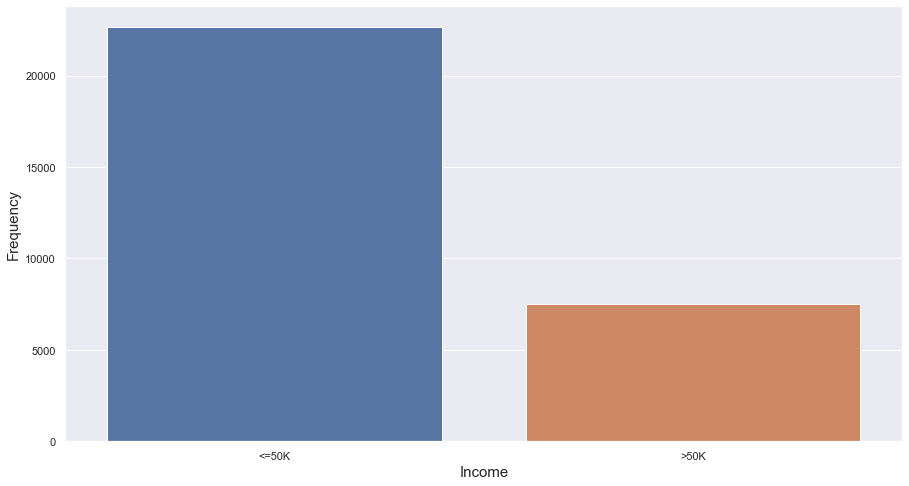

In [13]:
plt.figure(figsize =(15,8));
sns.countplot(x = 'income', data = df);
plt.xlabel("Income",fontsize = 15);
plt.ylabel("Frequency",fontsize = 15);

From this graph, we can see that people who earned less than 50K are much more than the people who earned more than 50K.

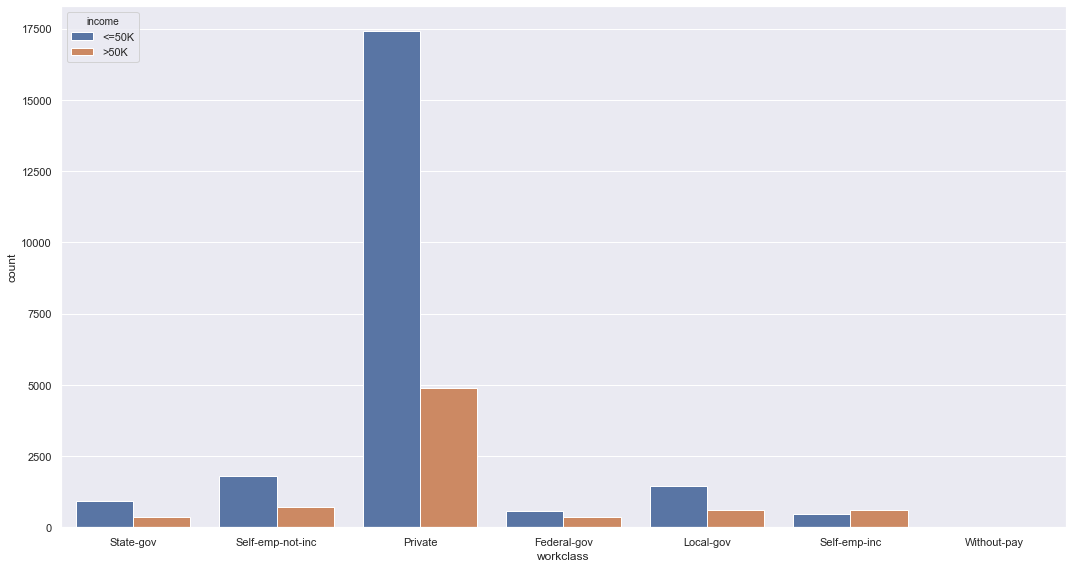

In [14]:
fig = plt.figure(figsize=(15,8))
sns.countplot('workclass', hue='income', data=df)
plt.tight_layout()
plt.show()

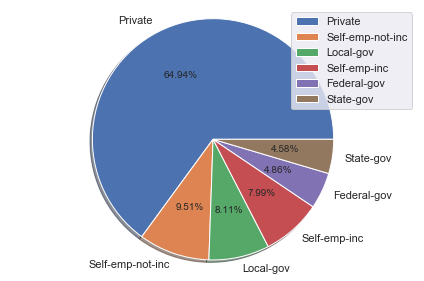

In [15]:
df1= df.loc[df['income'] == '>50K',['workclass']]
workclass_types = df1['workclass'].value_counts()
labels = list(workclass_types.index)
aggregate = list(workclass_types)
# This Pie chat shows the Percentage of different workclass who earns more than 50K
plt.pie(aggregate, labels = labels, autopct='%1.2f%%', shadow=True)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()

From this graph, we can see people who worked in private working class have higher percentage of earning more than 50K per year.

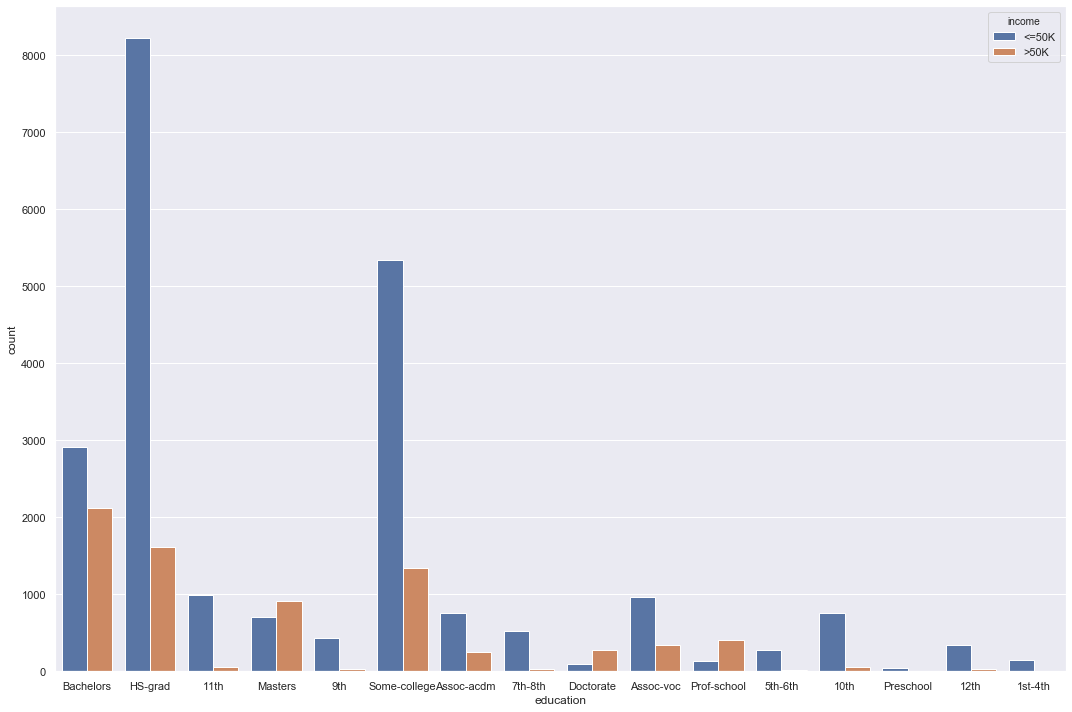

In [16]:
fig = plt.figure(figsize=(15,10))
sns.countplot('education', hue='income', data=df)
plt.tight_layout()
plt.show()

From this graph, we can see that people who have higher education level have higher percentage of earning more than 50K each year.

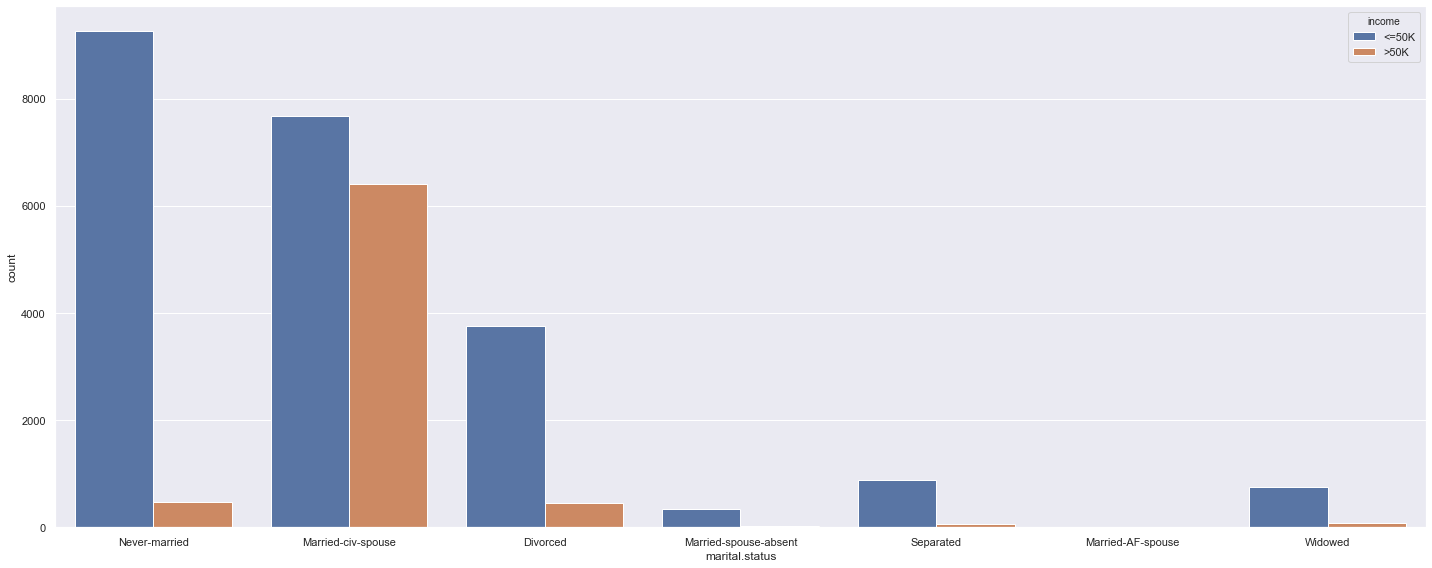

In [17]:
fig = plt.figure(figsize=(20,8))
sns.countplot('marital.status', hue='income', data=df)
plt.tight_layout()
plt.show()

From this graph, we can see people who are married have highest percentage of earning 50K each year, we can conclude that a good marital relationship is a key for earning more money.

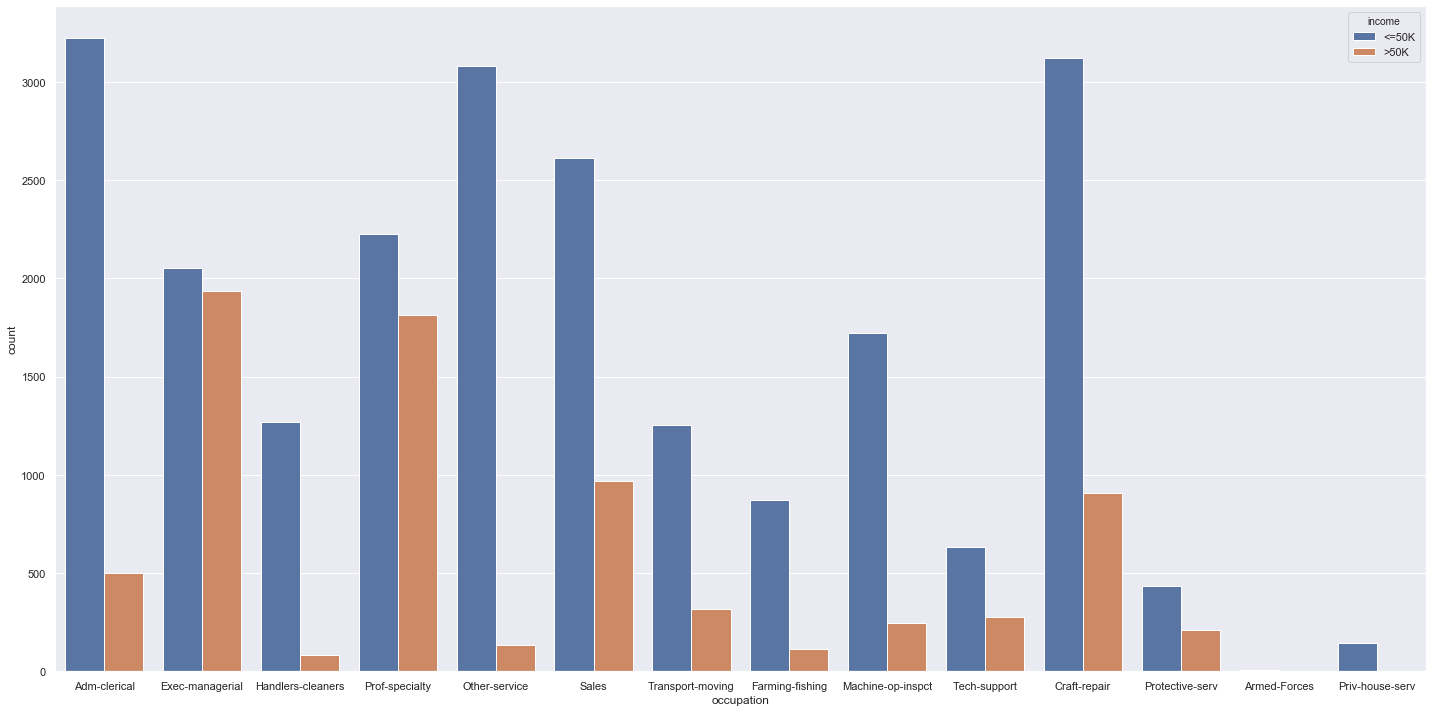

In [18]:
fig = plt.figure(figsize=(20,10))
sns.countplot('occupation', hue='income', data=df)
plt.tight_layout()
plt.show()

From this graph, we can see that who are Exec-managerial and Prof-speciality have higher percentage of earning 50K each year.

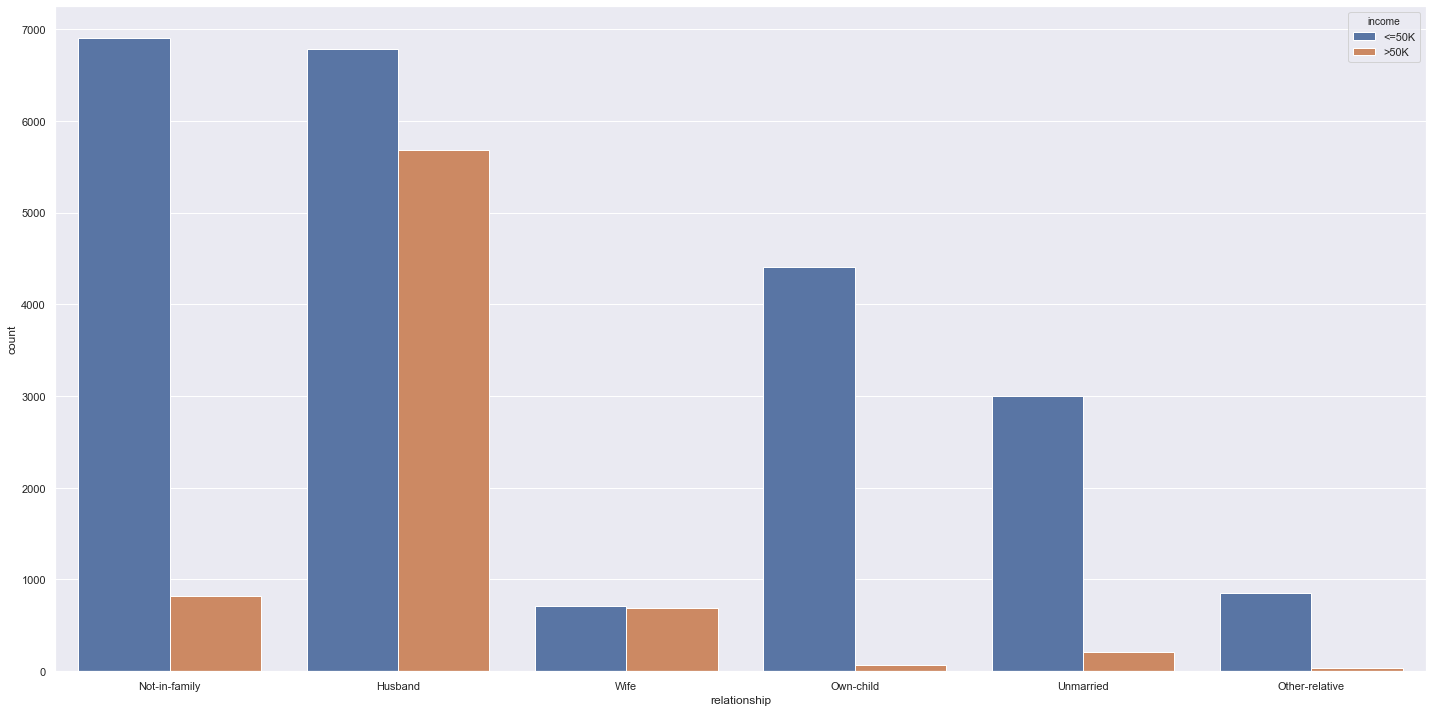

In [19]:
fig = plt.figure(figsize=(20,10))
sns.countplot('relationship', hue='income', data=df)
plt.tight_layout()
plt.show()

From this graph, we can see in a family, husband have higher percentage of earning more than 50K each year.

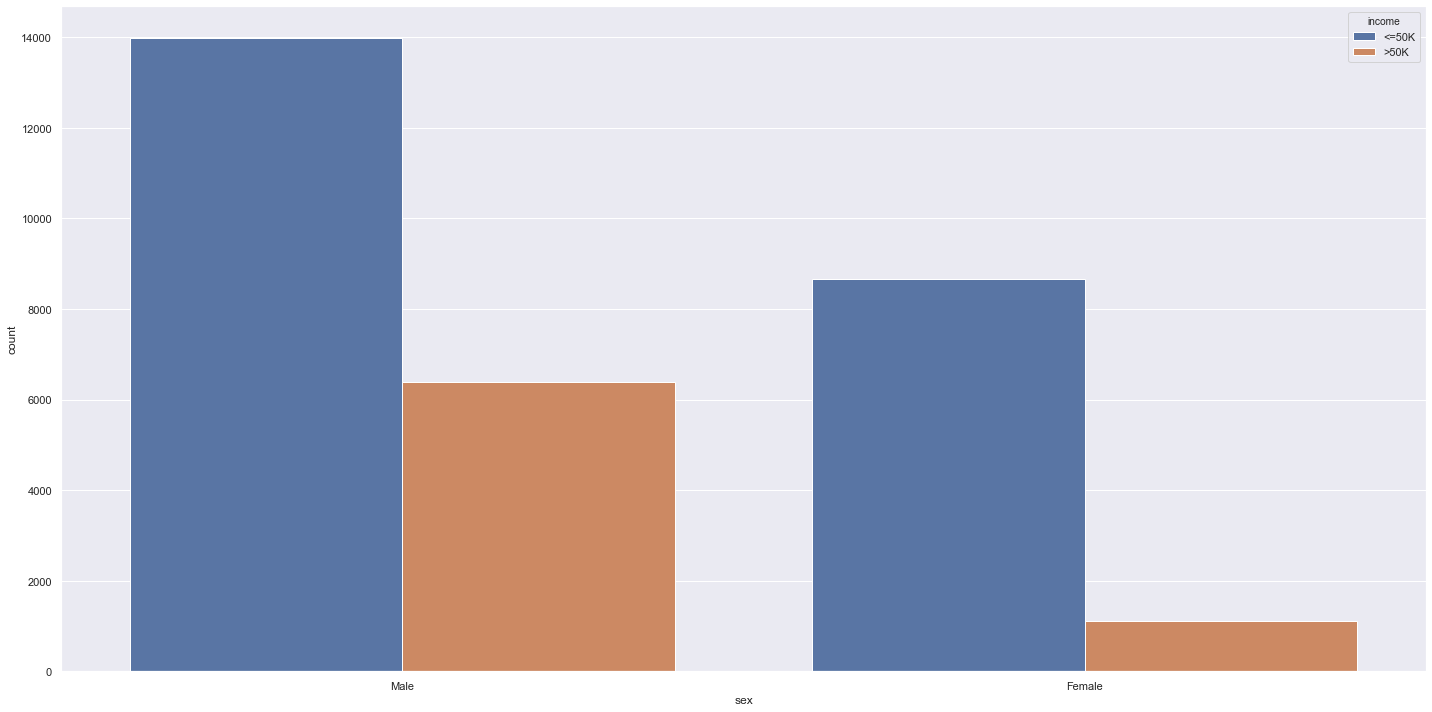

In [20]:
fig = plt.figure(figsize=(20,10))
sns.countplot('sex', hue='income', data=df)
plt.tight_layout()
plt.show()

From this graph, the proportion of males earning more than 50k a year is more than double of their female counterparts.

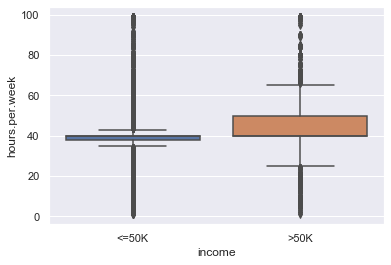

In [21]:
sns.boxplot(y='hours.per.week',x='income',data=df)

From this graph, we can see people who earned more than 50K worked more hours per week than the people who earned less than 50K.

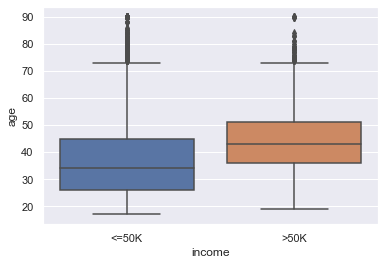

In [22]:
sns.boxplot(y='age',x='income',data=df)

From this graph, we can see that the average age of people who earned more than 50K are higher than the people who earned less than 50K.

In [23]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

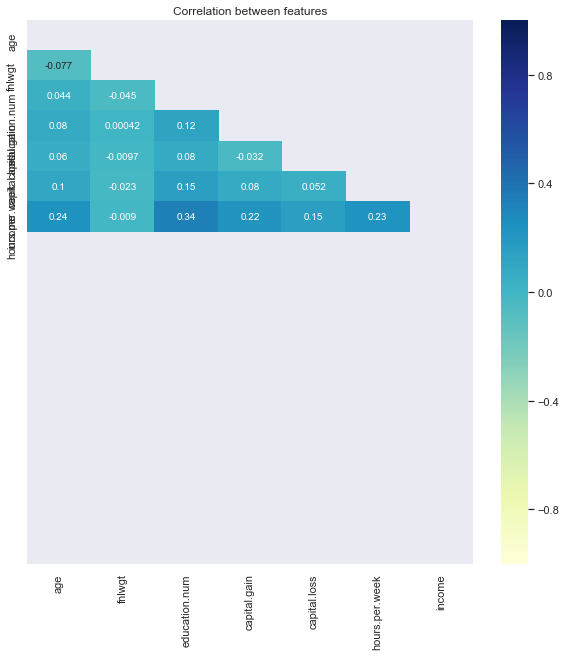

In [24]:
mask = np.triu(df.corr())
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='YlGnBu', mask=mask)
plt.ylim(18, 0)
plt.title('Correlation between features')
plt.show() #Correlation Matrix

In [25]:
corrmat=df.corr()
corrmat['income'].sort_values(ascending = False)

income            1.000000
education.num     0.335286
age               0.241998
hours.per.week    0.229480
capital.gain      0.221196
capital.loss      0.150053
fnlwgt           -0.008957
Name: income, dtype: float64

Education, age, education,and  hours per week are the key to earn more money, they are strong positive relationship with income.

### Modeling: 

Supervised learning is an approach to creating artificial intelligence (AI), where the program is given labeled input data and the expected output results. The AI system is specifically told what to look for, thus the model is trained until it can detect the underlying patterns and relationships, enabling it to yield good results when presented with never-before-seen data.

Supervised learning is good at classification and regression problems. In supervised learning, the aim is to make sense of data toward specific measurements. 

After looking at the data, I decid to use classification algorithms. A classification algorithm tries to determine the class or the category of the data it is presented with.

The algorithms are used in this project:

1. Logistic Regression.
2. KNN.
3. Decision Tree.
4. SVM.
5. Random Forest.
3. Decision Tree.
6. Gaussian Naive Bayes.

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
le = LabelEncoder()

In [27]:
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = le.fit_transform(df[col])

In [28]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
Scaler = StandardScaler()
X_train = pd.DataFrame(Scaler.fit_transform(X_train))
X_test = pd.DataFrame(Scaler.transform(X_test))

In [30]:
print(X_train.shape) #training dataset has 24,129 rows.
print(X_test.shape) #test dastaet has 6,033 rows.

(24129, 14)
(6033, 14)


In [31]:
l=[]

#### Logistic Regression:

In [32]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=42)
LR_model=LR.fit(X_train, y_train)

ypred_LR = LR.predict(X_test)
accuracy = accuracy_score(y_test, ypred_LR)
print('Accuracy score of Logistic Regression:', accuracy * 100)
l.append(accuracy)

Accuracy score of Logistic Regression: 81.76694845019061


#### K-Nearest Neighbours:

In [33]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=15)
KNN_model=KNN.fit(X_train,y_train)

ypred_KNN = KNN.predict(X_test)
accuracy = accuracy_score(y_test,ypred_KNN)
print('Accuracy score of KNN:', accuracy * 100)
l.append(accuracy)

Accuracy score of KNN: 82.47969501077408


#### Decision Tree:

In [34]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=1)
DT_model=DT.fit(X_train, y_train)

ypred_DT = DT.predict(X_test)
accuracy = accuracy_score(y_test, ypred_DT)
print('Accuracy score of Decision Tree:', accuracy * 100)
l.append(accuracy)

Accuracy score of Decision Tree: 80.59008785015746


#### Support Vector Machine:

In [35]:
from sklearn.svm import SVC
SVM = SVC(random_state = 42)
SVM_model=SVM.fit(X_train, y_train)

ypred_SVM = SVM.predict(X_test)
accuracy = accuracy_score(y_test, ypred_SVM)
print('Accuracy score of SVM:', accuracy * 100)
l.append(accuracy)

Accuracy score of SVM: 84.02121664180342


#### Random Forest:

In [36]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
RF_model=RF.fit(X_train,y_train)

ypred_RF = RF.predict(X_test)
accuracy = accuracy_score(y_test,ypred_RF)
print('Accuracy score of Random Forest:', accuracy * 100)
l.append(accuracy)

Accuracy score of Random Forest: 85.03232222774739


#### Gaussian Naive Bayes: 

In [37]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB_model=GNB.fit(X_train, y_train)

ypred_GNB = GNB.predict(X_test)
accuracy = accuracy_score(y_test, ypred_GNB)
print('Accuracy score of Gaussian Naive Bayes:', accuracy * 100)
l.append(accuracy)

Accuracy score of Gaussian Naive Bayes: 78.86623570363004


### Model Evaluation and Selection: 

In [38]:
print('Accuracy score of Logistic Regression: {}'.format(accuracy_score(y_test, ypred_LR)*100))

print('Accuracy score of K-Nearest Neighbours: {}'.format(accuracy_score(y_test, ypred_KNN)*100))

print('Accuracy score of Decision Tree: {}'.format(accuracy_score(y_test, ypred_DT)*100))

print('Accuracy score of Support Vector Machine: {}'.format(accuracy_score(y_test, ypred_SVM)*100))

print('Accuracy score of Random Forest: {}'.format(accuracy_score(y_test, ypred_RF)*100))

print('Accuracy score of Gaussian Naive Bayes:{}'.format(accuracy_score(y_test,ypred_GNB)*100))

Accuracy score of Logistic Regression: 81.76694845019061
Accuracy score of K-Nearest Neighbours: 82.47969501077408
Accuracy score of Decision Tree: 80.59008785015746
Accuracy score of Support Vector Machine: 84.02121664180342
Accuracy score of Random Forest: 85.03232222774739
Accuracy score of Gaussian Naive Bayes:78.86623570363004


The accuracy score of Random Forest is 85.0323.

Therefore, for these six models, Random Forest Classifer is the best model to predict adult income by giving these variables.

### Conclusion: 

In this project, we found that income can be determined by a lot of factors, this dataset involves predicting personal income levels as above or below 50,000 dollars per year based on personal details such as relationship and education level. There are many more cases of incomes less than $50K than above 50,000 dollars, although the skew is not severe. We found that a good marital relationship is a key for earning more money, people who married have higher percentage of earning more than 50K each year.

After comparing the accuracy score of these six models, we found that Random Forest Classifer is the best model to predict adult income by giving these variables.

### Future Work:

To derive even more accurate results, we'd like to expand the project with additional data, specifically 'Years'. Therefore, we will use the Time Series analysis to improve our model. Also, we can add 'Parents' education level','Health' and 'Location' variables to analyze the relationships with adult income.

### Resource:

https://data-flair.training/blogs/machine-learning-classification-algorithms/

https://monkeylearn.com/blog/classification-algorithms/